# 人工神经网络

## 问题设定

考虑一个四分类问题，我们首先生成他们的图像如下图所示：

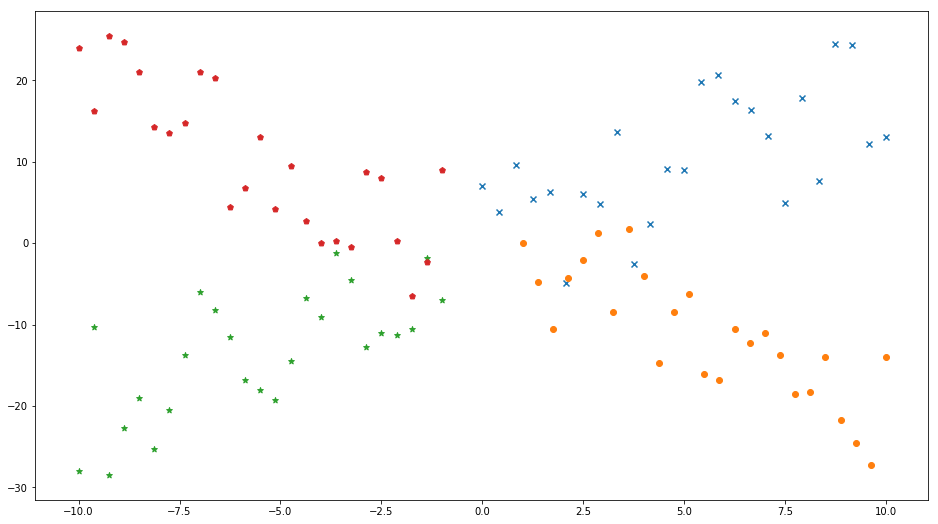

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

data_count = 25

x1_points = np.linspace(0, 10, data_count).reshape((-1, 1))
x2_points = np.multiply(2, x1_points) + np.random.randint(-10, 10, size=(data_count,)).reshape((-1, 1))

x1 = np.concatenate((x1_points, x2_points), axis=1)
y1 = np.array([[1, 0, 0, 0]] * data_count)

x1_points = np.linspace(1, 10, data_count).reshape((-1, 1))
x2_points = np.multiply(-2, x1_points) + np.random.randint(-10, 10, size=(data_count,)).reshape((-1, 1))

x2 = np.concatenate((x1_points, x2_points), axis=1)
y2 = np.array([[0, 1, 0, 0]] * data_count)

x1_points = np.linspace(-1, -10, data_count).reshape((-1, 1))
x2_points = np.multiply(2, x1_points) + np.random.randint(-10, 10, size=(data_count,)).reshape((-1, 1))

x3 = np.concatenate((x1_points, x2_points), axis=1)
y3 = np.array([[0, 0, 1, 0]] * data_count)

x1_points = np.linspace(-1, -10, data_count).reshape((-1, 1))
x2_points = np.multiply(-2, x1_points) + np.random.randint(-10, 10, size=(data_count,)).reshape((-1, 1))

x4 = np.concatenate((x1_points, x2_points), axis=1)
y4 = np.array([[0, 0, 0, 1]] * data_count)

x_data = np.concatenate((x1, x2, x3, x4))
y_data = np.concatenate((y1, y2, y3, y4))

plt.figure(figsize=(16, 9))
plt.scatter(x1[:, 0], x1[:, 1], marker='x')
plt.scatter(x2[:, 0], x2[:, 1], marker='o')
plt.scatter(x3[:, 0], x3[:, 1], marker='*')
plt.scatter(x4[:, 0], x4[:, 1], marker='p')
plt.show()

对于数据集$X, Y$，$X$是一个$(N, 2)$维的数组，$Y$是一个经过独热处理（One-hot）的$(N, 4)$维的数组，对于某一个$y_i$，它形如：

$$
y_i = [0, 1, 0, 0]
$$

我们希望设计一个人工全连接神经网络，它具有多个隐含层，每个隐含层有多个神经元，在这个问题中，我们设定两个隐含层，每个隐含层有6个神经元。

## Softmax Cross Entropy

对于一个四分类问题，神经网络的输出层将有4个输出神经元，将这4个输出通过一个Softmax函数后计算交叉熵，我们可以写出如下损失函数：

$$
SoftmaxCrossEntropy \left( w^3_{i, j}, w^2_{i, j}, w^1_{i, j} \right) = \sum^{N}_{i=0} \left (\sum^{4}_{j=1} y_j \cdot - \ln p(z_j) \right)
$$

其中$p_j(z)$是Softmax函数：

$$
p(z_j) = \frac{e^{a^3_j}}{\sum^{4}_{k=1}e^{a^3_k}}
$$

与线性回归与Logistic Regression直接求各个权重的梯度不同，在神经网络中，使用反向传播算法求梯度。

## 反向传播

我们设计的神经网络是具有一个输入层，两个隐含层，一个输出层的网络，考虑输出层的第一个神经元的权重$w^3_{1, 1}$的梯度，我们将Softmax记作$p(z)$：

$$
\begin{aligned}
\frac{\partial l(W)}{\partial w^3_{1, 1}} &= - \sum^{N}_{i=0} \left( \sum^{4}_{j=1} \frac{\partial l(W)}{\partial \ln p} \cdot \frac{\partial \ln p}{\partial a^3_j} \cdot \frac{\partial a^3_j}{\partial w^3_{1, 1}} \right) \\
&= - \sum^{N}_{i=0} \left( \frac{y_1 \cdot \sum^{4}_{k=1}e^{a^3_k}}{e^{a^3_1}} \cdot \frac{e^{a^3_1} \cdot \sum^{4}_{k=1}e^{a^3_k} - \left( e^{a^3_1} \right )^2}{\left (\sum^{4}_{k=1}e^{a^3_k} \right)^2} + \sum^{4}_{j=2} \frac{y_j \cdot \sum^{4}_{k=1}e^{a^3_k}}{e^{a^3_j}} \cdot \frac{0 - a^3_j \cdot a^3_1}{(\sum^{4}_{k=1} e^{a^3_k})^2} \right)  \cdot z^3_1  \\ 
&= - \sum^{N}_{i=0} \left( y_1 \cdot (1 - \frac{a^3_1}{\sum^{4}_{k=1}e^{a^3_k}}) - \sum^{4}_{j=2} y_j \cdot \frac{a^3_1}{\sum^{4}_{k=1}e^{a^3_k}} \right) \cdot z^3_1  \\ 
&= - \sum^{N}_{i=0} \left( y_1 - (y_1 + y_2 + y_3 + y_4) \cdot - \frac{a^3_1}{\sum^{4}_{k=1}e^{a^3_k}} \right)  \cdot z^3_1 \\ 
&= - \sum^{N}_{i=0} \left( y_1 - \frac{a^3_1}{\sum^{4}_{k=1}e^{a^3_k}} \right) \cdot z^3_1 \\ 
\end{aligned}
$$

然后我们考虑第二个隐含层第一个神经元权重$w^2_{1, 1}$的梯度:

$$
\sum^{4}_{i=1} \left ( \frac{\partial l(W)}{\partial \ln p} \cdot  \frac{\partial \ln p}{\partial z^3_i} \cdot \frac{\partial z^3_i}{\partial a^2_1} \cdot \frac{\partial a^2_1}{\partial z^2_1} \right ) \cdot \frac{\partial z^2_1}{\partial w^2_{1, 1}}
$$

通过观察可以发现此项可以在计算输出的前向传播过程计算并缓存：

$$
\frac{\partial a^2_1}{\partial z^2_1} \cdot \frac{\partial z^2_1}{\partial w^2_{1, 1}}
$$

各层权重的更新是逆层序的，而在计算$w^2_{1, 1}$前，已经完成了关于$w^3_{i, j}$的计算，而项中：

$$
\sum^{4}_{i=1} \left ( \frac{\partial l(W)}{\partial \ln p} \cdot  \frac{\partial \ln p}{\partial z^3_i} \cdot \frac{\partial z^3_i}{\partial a^2_1} \right )
$$

即是误差的反向传播项，这些项已经在上层的梯度计算中完成并缓存，故在更新本层权重时，直接提取缓存即可。

一个支持：
- 自定义隐含层数
- 自定义神经元数量
- 自定义每层激活函数（Sigmoid、tanh、ReLU、Linear）
- 自定义损失函数（Softmax Cross Entropy、MSE）
- 自定义超参数（学习率、迭代次数、Batch Size）
- 模型的本地化   

的低效率的模型被实现：
[Artifical Neuron Network (ANN)](https://github.com/Ceruleanacg/Descent/blob/master/nn/dense.py)
，我们将直接使用这个模型模拟实验结果。

In [6]:
import sys

sys.path.append('../')

from sklearn.preprocessing import StandardScaler
from utility import function
from nn.dense import Dense

x_train = StandardScaler().fit_transform(x_data)
y_train = y_data

activation_funcs = [function.relu] * 2
# activation_funcs = [function.sigmoid] * 1
activation_funcs.append(function.linear)

dense = Dense(x_space=2, y_space=4, hidden_units_list=[6, 6], **{
    "loss_func": function.softmax_cross_entropy,
    "activation_funcs": activation_funcs,
    "learning_rate": 0.003,
    "enable_logger": True,
    "model_name": 'base',
    "batch_size": 100,
    "max_epoch": 1000,
    'model': 'train',
})

dense.train(x_data, y_data)

Model saved.
Accuracy: 0.390 
Epoch: 0 | loss: 138.629275
Model saved.
Accuracy: 0.610 
Epoch: 100 | loss: 127.327139
Model saved.
Accuracy: 0.860 
Epoch: 200 | loss: 103.538487
Model saved.
Accuracy: 0.710 
Epoch: 300 | loss: 96.939174
Model saved.
Accuracy: 0.920 
Epoch: 400 | loss: 92.262520
Model saved.
Accuracy: 0.910 
Epoch: 500 | loss: 92.282685
Model saved.
Accuracy: 0.910 
Epoch: 600 | loss: 92.112034
Model saved.
Accuracy: 0.910 
Epoch: 700 | loss: 91.908351
Model saved.
Accuracy: 0.910 
Epoch: 800 | loss: 91.895093
Model saved.
Accuracy: 0.910 
Epoch: 900 | loss: 91.658254


我们绘制出分类器的结果：

Accuracy: 0.920 


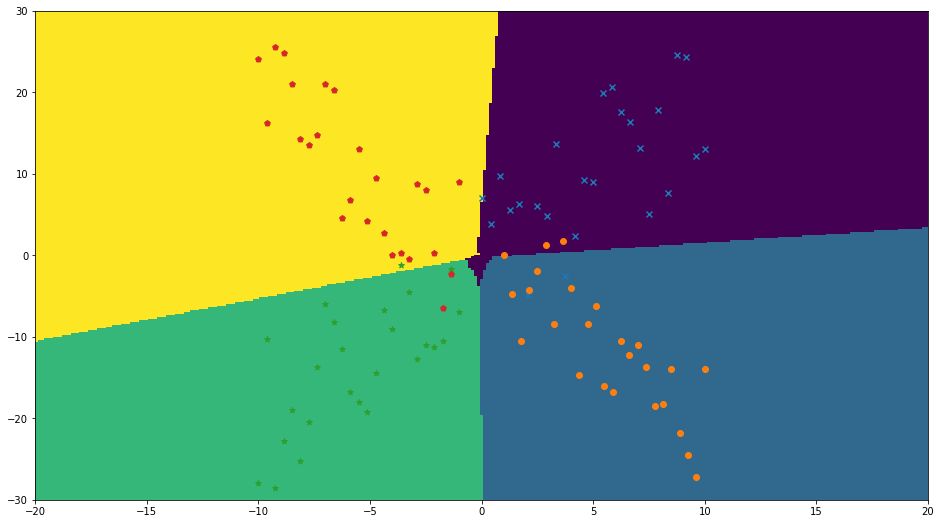

In [8]:
dense.evaluate(x_data, y_data)

x1_test = np.linspace(-20, 20, 300)
x2_test = np.linspace(-30, 30, 300)

x1_mesh, x2_mesh = np.meshgrid(x1_test, x2_test)

x_test = np.array([x1_mesh.ravel(), x2_mesh.ravel()]).T
y_test = np.argmax(dense.predict(x_test), axis=1)

plt.figure(figsize=(16, 9))
plt.pcolormesh(x1_mesh, x2_mesh, y_test.reshape(x1_mesh.shape))
plt.scatter(x1[:, 0], x1[:, 1], marker='x')
plt.scatter(x2[:, 0], x2[:, 1], marker='o')
plt.scatter(x3[:, 0], x3[:, 1], marker='*')
plt.scatter(x4[:, 0], x4[:, 1], marker='p')
plt.show()